<a href="https://colab.research.google.com/github/VeronicaIovchik/Heartbeat_classification_challenge_final_project/blob/main/transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformation into Image (mel spec)

##Previous steps:<br>
[EDA](https://colab.research.google.com/drive/13IW8MXXF0mA_OdzKRmicp_WhywpF-Z9x?usp=sharing)<br>
[Pre Proccesing](https://colab.research.google.com/drive/1OGzS2707fWGgatPNX0OPuWYmgEVGzATe?usp=sharing)<br>

⏩ the data after the pre-proccesing is: set_A + set_A_augm_1 + set_A_augm_2

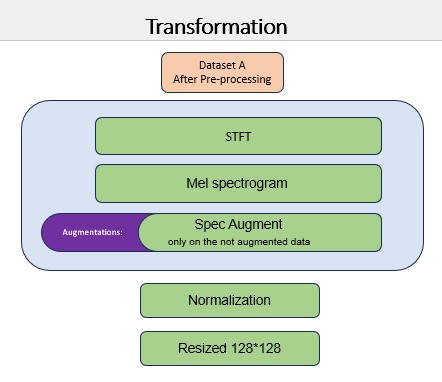

#Load main libraries

In [ ]:
# generals
import os
import shutil
import pandas as pd
import numpy as np
import random

# plots
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import skimage.io

#audio
import wave
import IPython.display as ipd
import librosa
from scipy import signal
import soundfile as sf

#trnaformation
from skimage.transform import resize

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/Project/DATA_2

Mounted at /content/drive
/content/drive/MyDrive/Project/DATA_2


#STFT + Mel Spectrogram

In [ ]:
def generate_mel_spectrogram(audio_path):
    # Load the audio file
    audio, sr = librosa.load(audio_path, sr=None)
    # print(f'audio shape: {audio.shape}, sr: {sr}')

    #Parameters:
    n_fft = 200
    hop_length = 50

    # Apply Short-Time Fourier Transform (STFT)
    stft = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length, window='hann', center=True)
    #print("stft shape:",stft.shape[0])

    #plt
    # librosa.display.specshow(stft, sr=sr, n_fft=n_fft, hop_length=hop_length, x_axis='time', y_axis='mel')
    # plt.title('stft')
    # plt.tight_layout()
    # plt.ylim([0,300])
    # plt.show()

    n_mels = 128  # Number of mel frequency bins - defult is 128


    magnitude_spectrogram = np.abs(stft)
    #plt
    # plt.magnitude_spectrum(audio)
    # plt.show()

    # #librosa.display.specshow(magnitude_spectrogram, sr=sr, n_fft=n_fft, hop_length=hop_length, x_axis='time', y_axis='mel')
    # librosa.display.waveshow(magnitude_spectrogram, sr=sr, axis='time')
    # plt.title('magnitude_spectrogram')
    # plt.tight_layout()
    # plt.show()


    # Convert to mel-spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(S=magnitude_spectrogram, sr=sr, hop_length=hop_length, center=True, n_mels=128)
    #print("mel shape:",mel_spectrogram.shape)

    #plt
    # librosa.display.specshow(mel_spectrogram, sr=sr, n_fft=n_fft, hop_length=hop_length, x_axis='time', y_axis='mel')
    # plt.title('mel_spectrogram')
    # plt.tight_layout()
    # plt.ylim([0,300])
    # plt.show()

    # Convert to log scale
    log_mel_spectrogram = librosa.amplitude_to_db(mel_spectrogram, ref=np.max)

    # #plot
    # plt.figure(figsize=(10, 5))
    # librosa.display.specshow(log_mel_spectrogram, sr=sr, n_fft=n_fft, hop_length=hop_length, x_axis='time', y_axis='mel')
    # plt.ylim([0,500])
    # plt.colorbar(format='%+2.0f dB')
    # plt.title('STFT to Mel Spectrogram')
    # plt.tight_layout()
    # plt.show()

    # returns the mel-spectrogram as a numpy array
    return log_mel_spectrogram



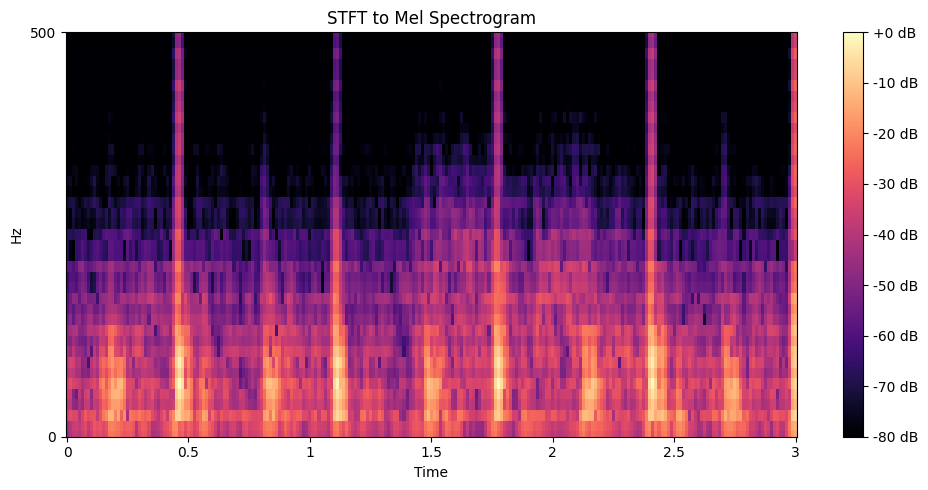

In [ ]:
# #test
#path = "/content/drive/MyDrive/Project/DATA_2_splitted/set_A/Atraining_normal/Atraining_normal_201106221418_0.wav"
path = "/content/drive/MyDrive/Project/DATA_2_splitted/set_B/Bunlabelledtest/Bunlabelledtest_217_1308246111629_D_0.wav"

# #path = "/content/drive/MyDrive/Project/DATA_2_transformation/set_A/Atraining_normal/Atraining_normal_201106221418_0_mel.npy"
# # x  = np.load(path)

x = generate_mel_spectrogram(path)
# #x.shape

In [ ]:
def apply_mel_spectrogram(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over the subfolders in the set folder
    subfolders = os.listdir(input_folder)
    for subfolder in subfolders:
      subfolder_path = os.path.join(input_folder, subfolder)
      if os.path.isdir(subfolder_path):
          output_subfolder_path = os.path.join(output_folder, subfolder)
          os.makedirs(output_subfolder_path, exist_ok=True)

          for filename in os.listdir(subfolder_path):
              if filename.endswith(".wav"):
                  audio_path = os.path.join(subfolder_path, filename)
                  #y, sr = librosa.load(audio_path, sr=None)

                  # Generate mel spectrogram
                  mel_array = generate_mel_spectrogram(audio_path)

                  # Save the mel array after mel spectrogram
                  output_path = os.path.join(output_subfolder_path, f"{filename.split('.')[0]}_mel.npy")
                  np.save(output_path, mel_array)
                  print(f"Mel spectrogram array of {filename} saved as {output_path}")

                  # # Save the mel spec as IMG
                  # output_subfolder_path2 = os.path.join(output_folder, subfolder+"_IMG")
                  # os.makedirs(output_subfolder_path2, exist_ok=True)
                  # output_path2 = os.path.join(output_subfolder_path2, f"{filename.split('.')[0]}_IMG.png")
                  # #opt1
                  # save_spec_as_img(mel_array, 4410 ,output_path2)
                  # #opt2
                  # #save_spec_as_img_option_2(mel_array, output_path2)

                  # print(f"IMG of Mel spec of {filename} saved as {output_path2}")


## save as np array

In [ ]:
#apply mel spectrogram to data set A + augm1 + augm2

input_path = "/content/drive/MyDrive/Project/DATA_2_splitted"
output_path = "/content/drive/MyDrive/Project/DATA_2_transformation"
folders = os.listdir(input_path)
# print(folders)
for folder_name in folders:
  if folder_name == "set_B":
    continue
  print(f'{folder_name}:')
  input_folder_path = input_path + '/' + folder_name
  output_folder_path = output_path + '/' + folder_name
  # print(input_folder_path)
  # print(output_folder_path)

  #transform all the audio files into mel spctrograms:
  apply_mel_spectrogram(input_folder_path, output_folder_path)

  print(f'{folder_name} done\n')


set_A:
Mel spectrogram array of Atraining_normal_201106221418_0.wav saved as /content/drive/MyDrive/Project/DATA_2_transformation/set_A/Atraining_normal/Atraining_normal_201106221418_0_mel.npy
Mel spectrogram array of Atraining_normal_201106221418_1.wav saved as /content/drive/MyDrive/Project/DATA_2_transformation/set_A/Atraining_normal/Atraining_normal_201106221418_1_mel.npy
Mel spectrogram array of Atraining_normal_201106151236_0.wav saved as /content/drive/MyDrive/Project/DATA_2_transformation/set_A/Atraining_normal/Atraining_normal_201106151236_0_mel.npy
Mel spectrogram array of Atraining_normal_201106151236_1.wav saved as /content/drive/MyDrive/Project/DATA_2_transformation/set_A/Atraining_normal/Atraining_normal_201106151236_1_mel.npy
Mel spectrogram array of Atraining_normal_201106210943_0.wav saved as /content/drive/MyDrive/Project/DATA_2_transformation/set_A/Atraining_normal/Atraining_normal_201106210943_0_mel.npy
Mel spectrogram array of Atraining_normal_201104141251_0.wav sa

## save as IMG

In [ ]:
def save_spec_as_img(mel_array, sr, output_path): #zoom in

    mel_array = np.load(mel_array)

    #option1 (zoom in)
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.axis('off')
    librosa.display.specshow(mel_array, sr=sr, n_fft=200, hop_length=50, x_axis='time', y_axis='mel')
    plt.ylim(0, 500)
    ax.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0.0)
    plt.close(fig)


In [ ]:
def save_spec_as_img_option_2(mel_array, output_path): #original

    mel_array = np.load(mel_array)
    # same size as the original spec
    # Scale the spectrogram to fit inside 8-bit range
    def scale_minmax(X, min=0.0, max=1.0):
        X_std = (X - X.min()) / (X.max() - X.min())
        X_scaled = X_std * (max - min) + min
        return X_scaled

    # Logarithmic scaling and flipping the image along the y-axis
    img = scale_minmax(mel_array, 0, 255).astype(np.uint8)
    img = np.flip(img, axis=0)  # put low frequencies at the bottom in image
    #img = 255 - img  # invert: make black==more energy

    # Convert grayscale image to RGB
    img_rgb = plt.cm.magma(img)[:, :, :3]

    # Convert to uint8 format
    img_rgb = (img_rgb * 255).astype(np.uint8)

    # Save as PNG
    skimage.io.imsave(output_path, img_rgb)

In [ ]:
def apply_mel_spectrogram_IMG(input_folder, output_folder, opt):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over the subfolders in the set folder
    subfolders = os.listdir(input_folder)
    for subfolder in subfolders:
      subfolder_path = os.path.join(input_folder, subfolder)
      if os.path.isdir(subfolder_path):
          output_subfolder_path = os.path.join(output_folder, subfolder)
          os.makedirs(output_subfolder_path, exist_ok=True)

          for filename in os.listdir(subfolder_path):
              if filename.endswith(".npy"):
                  mel_array_path = subfolder_path+"/"+filename
                  # Save the mel spec as IMG
                  output_path2 = os.path.join(output_subfolder_path, f"{filename.split('.')[0]}_IMG.png")

                  if opt == "zoom":
                  # #opt1 = zoom in
                    save_spec_as_img(mel_array_path, 4410 ,output_path2)

                  elif opt == "og":
                  # #opt2 = original
                    save_spec_as_img_option_2(mel_array_path, output_path2)

                  print(f"IMG of Mel spec of {filename} saved as {output_path2}")

In [ ]:
# save all the mel spec as img

input_path = "/content/drive/MyDrive/Project/DATA_2_transformation"
# opt1 zoom in
# output_path = "/content/drive/MyDrive/Project/DATA_2_transformation_IMG"

#opt2 original
output_path = "/content/drive/MyDrive/Project/DATA_2_transformation_IMG_2"
folders = os.listdir(input_path)
# print(folders)
for folder_name in folders:
  if folder_name == "set_B":
    continue
  print(f'{folder_name}:')
  input_folder_path = input_path + '/' + folder_name
  output_folder_path = output_path + '/' + folder_name
  # print(input_folder_path)
  # print(output_folder_path)

  #transform all the mel spctrograms into IMG:
  apply_mel_spectrogram_IMG(input_folder_path, output_folder_path, "og")


  print(f'{folder_name} done\n')

set_A:
IMG of Mel spec of Atraining_normal_201106221418_0_mel.npy saved as /content/drive/MyDrive/Project/DATA_2_transformation_IMG_2/set_A/Atraining_normal/Atraining_normal_201106221418_0_mel_IMG.png
IMG of Mel spec of Atraining_normal_201106151236_0_mel.npy saved as /content/drive/MyDrive/Project/DATA_2_transformation_IMG_2/set_A/Atraining_normal/Atraining_normal_201106151236_0_mel_IMG.png
IMG of Mel spec of Atraining_normal_201104141251_1_mel.npy saved as /content/drive/MyDrive/Project/DATA_2_transformation_IMG_2/set_A/Atraining_normal/Atraining_normal_201104141251_1_mel_IMG.png
IMG of Mel spec of Atraining_normal_201106151236_1_mel.npy saved as /content/drive/MyDrive/Project/DATA_2_transformation_IMG_2/set_A/Atraining_normal/Atraining_normal_201106151236_1_mel_IMG.png
IMG of Mel spec of Atraining_normal_201106221418_1_mel.npy saved as /content/drive/MyDrive/Project/DATA_2_transformation_IMG_2/set_A/Atraining_normal/Atraining_normal_201106221418_1_mel_IMG.png
IMG of Mel spec of Atra

<ipython-input-5-a8f5a99502c3>:22: UserWarning: /content/drive/MyDrive/Project/DATA_2_transformation_IMG_2/set_A_SpecAugm/Aunlabelledtest/Aunlabelledtest_201108011111_0_mel_augm_IMG.png is a low contrast image
  skimage.io.imsave(output_path, img_rgb)


#Spectrogram Augmentation

In [ ]:
# SpecAugment Implementation for Tensorflow.
# Related paper : https://arxiv.org/pdf/1904.08779.pdf
def spec_augment(mel_spectrogram, time_warping_para=80, frequency_masking_para=100,
                 time_masking_para=27, frequency_mask_num=2, time_mask_num=1):

    '''
    Spec augmentation Calculation Function.

      'SpecAugment' have 3 steps for audio data augmentation.
      first step is time warping using Tensorflow's image_sparse_warp function.
      Second step is frequency masking, last step is time masking.

      # Arguments:
        mel_spectrogram(numpy array): audio file path of you want to warping and masking.
        time_warping_para(float): Augmentation parameter, "time warp parameter W".
          If none, default = 80 for LibriSpeech.
        frequency_masking_para(float): Augmentation parameter, "frequency mask parameter F"
          If none, default = 100 for LibriSpeech.
        time_masking_para(float): Augmentation parameter, "time mask parameter T"
          If none, default = 27 for LibriSpeech.
        frequency_mask_num(float): number of frequency masking lines, "m_F".
          If none, default = 1 for LibriSpeech.
        time_mask_num(float): number of time masking lines, "m_T".
          If none, default = 1 for LibriSpeech.

      # Returns
        mel_spectrogram(numpy array): warped and masked mel spectrogram.
    '''


    # whan passing to the func the path of the mell array - use this line:
    mel_spectrogram = np.load(mel_spectrogram)

    #"reverse" the spec
    mel_spectrogram = librosa.db_to_amplitude(mel_spectrogram)

    # #plot
    # plt.figure(figsize=(10, 5))
    # librosa.display.specshow(mel_spectrogram, sr=4410, n_fft=200, hop_length=50, x_axis='time', y_axis='mel', fmax=8000)
    # plt.colorbar(format='%+2.0f dB')
    # plt.title('mel spec as amplitude')
    # plt.tight_layout()
    # plt.show()

    v = mel_spectrogram.shape[0]
    tau = mel_spectrogram.shape[1]


    # Step 1 : Time warping (TO DO...)
    warped_mel_spectrogram=mel_spectrogram
    warped_mel_spectrogram = np.zeros(mel_spectrogram.shape,
                                      dtype=mel_spectrogram.dtype)

    for i in range(v):
        for j in range(tau):
            offset_x = 0
            offset_y = 0
            if i + offset_y < v:
                warped_mel_spectrogram[i, j] = mel_spectrogram[(i + offset_y) % v, j]
            else:
                warped_mel_spectrogram[i, j] = mel_spectrogram[i, j]

    # Step 2 : Frequency masking
    for i in range(frequency_mask_num):
        f = np.random.uniform(low=0.0, high=frequency_masking_para)
        f = int(f)
        f0 = random.randint(0, v - f)
        warped_mel_spectrogram[f0:f0 + f, :] = 0
        # print(f"f:{f}, f0:{f0}, v:{v}, v-f:{v-f}")

    # Step 3 : Time masking
    for i in range(time_mask_num):
        t = np.random.uniform(low=0.0, high=time_masking_para)
        t = int(t)
        t0 = random.randint(0, tau - t)
        warped_mel_spectrogram[:, t0:t0 + t] = 0


    warped_mel_spectrogram= librosa.amplitude_to_db(warped_mel_spectrogram, ref=np.max)
    return warped_mel_spectrogram


In [ ]:
def apply_spec_augment(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over the subfolders in the set folder
    subfolders = os.listdir(input_folder)
    for subfolder in subfolders:
      subfolder_path = os.path.join(input_folder, subfolder)
      if os.path.isdir(subfolder_path):
          output_subfolder_path = os.path.join(output_folder+"_SpecAugm2", subfolder)
          os.makedirs(output_subfolder_path, exist_ok=True)

          for filename in os.listdir(subfolder_path):
              if filename.endswith(".npy"):
                  mell_path = os.path.join(subfolder_path, filename)
                  #print(mell_path)
                  # y = np.load(mell_path)

                  # SpecAugment
                  spec_augm = spec_augment(mell_path, time_warping_para=80, frequency_masking_para=27,
                  time_masking_para=100, frequency_mask_num=2, time_mask_num=1)

                  # Save the augmented spectrogram
                  output_path = os.path.join(output_subfolder_path, f"{filename.split('.')[0]}_augm.npy")

                  np.save(output_path, spec_augm)
                  print(f"Augmented spectrogram array of {filename} saved as {output_path}")


## save as np array

In [ ]:
#apply augmentation to data set A only

input_path = "/content/drive/MyDrive/Project/DATA_2_transformation"
output_path = "/content/drive/MyDrive/Project/DATA_2_transformation"
folders = os.listdir(input_path)
# print(folders)
for folder_name in folders:
  if folder_name == "set_A":
    print(f'{folder_name}:')
    input_folder_path = input_path + '/' + folder_name
    output_folder_path = output_path + '/' + folder_name
    # print(input_folder_path)
    # print(output_folder_path)

    #transform all the audio files into mel spctrograms:
    apply_spec_augment(input_folder_path, output_folder_path)

    print(f'{folder_name} done\n')

set_A:
Augmented spectrogram array of Atraining_normal_201106221418_0_mel.npy saved as /content/drive/MyDrive/Project/DATA_2_transformation/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201106221418_0_mel_augm.npy
Augmented spectrogram array of Atraining_normal_201106151236_0_mel.npy saved as /content/drive/MyDrive/Project/DATA_2_transformation/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201106151236_0_mel_augm.npy
Augmented spectrogram array of Atraining_normal_201104141251_1_mel.npy saved as /content/drive/MyDrive/Project/DATA_2_transformation/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201104141251_1_mel_augm.npy
Augmented spectrogram array of Atraining_normal_201106151236_1_mel.npy saved as /content/drive/MyDrive/Project/DATA_2_transformation/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201106151236_1_mel_augm.npy
Augmented spectrogram array of Atraining_normal_201106221418_1_mel.npy saved as /content/drive/MyDrive/Project/DATA_2_transformation/set_A_SpecAugm2/

## save as IMG

In [ ]:
# save all the mel spec AUGM as img

input_path = "/content/drive/MyDrive/Project/DATA_2_transformation"
output_path = "/content/drive/MyDrive/Project/DATA_2_transformation_IMG"
folders = os.listdir(input_path)
# print(folders)
for folder_name in folders:
  if folder_name == "set_A_SpecAugm2":
    print(f'{folder_name}:')
    input_folder_path = input_path + '/' + folder_name
    output_folder_path = output_path + '/' + folder_name
    # print(input_folder_path)
    # print(output_folder_path)

    #transform all the mel spctrograms into IMG:
    apply_mel_spectrogram_IMG(input_folder_path, output_folder_path, "zoom")

    print(f'{folder_name} done\n')

set_A_SpecAugm2:
IMG of Mel spec of Atraining_normal_201106221418_0_mel_augm.npy saved as /content/drive/MyDrive/Project/DATA_2_transformation_IMG/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201106221418_0_mel_augm_IMG.png
IMG of Mel spec of Atraining_normal_201106151236_0_mel_augm.npy saved as /content/drive/MyDrive/Project/DATA_2_transformation_IMG/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201106151236_0_mel_augm_IMG.png
IMG of Mel spec of Atraining_normal_201104141251_1_mel_augm.npy saved as /content/drive/MyDrive/Project/DATA_2_transformation_IMG/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201104141251_1_mel_augm_IMG.png
IMG of Mel spec of Atraining_normal_201106151236_1_mel_augm.npy saved as /content/drive/MyDrive/Project/DATA_2_transformation_IMG/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201106151236_1_mel_augm_IMG.png
IMG of Mel spec of Atraining_normal_201106221418_1_mel_augm.npy saved as /content/drive/MyDrive/Project/DATA_2_transformation_IMG/set_A

#Normalization just for np

In [ ]:
def normalize_for_np(spec_array_path):

    spectrogram = np.load(spec_array_path)
    min_value = np.min(spectrogram)
    max_value = np.max(spectrogram)
    normalized_spectrogram = (spectrogram - min_value) / (max_value - min_value)

    return normalized_spectrogram

In [ ]:
def apply_normalization_np(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over the subfolders in the set folder
    subfolders = os.listdir(input_folder)
    for subfolder in subfolders:
      subfolder_path = os.path.join(input_folder, subfolder)
      if os.path.isdir(subfolder_path):
          output_subfolder_path = os.path.join(output_folder, subfolder)
          os.makedirs(output_subfolder_path, exist_ok=True)

          for filename in os.listdir(subfolder_path):
              if filename.endswith(".npy"):
                  mell_path = os.path.join(subfolder_path, filename)
                  #y, sr = librosa.load(audio_path, sr=None)

                  # normalize the mell as np
                  normalized_spec_array = normalize_for_np(mell_path)

                  # Save the mel array after normalization
                  output_path = os.path.join(output_subfolder_path, f"{filename.split('.')[0]}_norm.npy")
                  np.save(output_path, normalized_spec_array)
                  print(f"Normalized Mel spectrogram array of {filename} saved as {output_path}")

In [ ]:
# save all the NORMALIZED mel spec as np array

input_path = "/content/drive/MyDrive/Project/DATA_2_transformation"
output_path = "/content/drive/MyDrive/Project/DATA_2_normalized"
folders = os.listdir(input_path)
# print(folders)
for folder_name in folders:
  if folder_name == "set_A_SpecAugm2":
    print(f'{folder_name}:')
    input_folder_path = input_path + '/' + folder_name
    output_folder_path = output_path + '/' + folder_name
    # print(input_folder_path)
    # print(output_folder_path)

    #transform all the mel spctrograms into IMG:
    apply_normalization_np(input_folder_path, output_folder_path)

    print(f'{folder_name} done\n')

set_A_SpecAugm2:
Normalized Mel spectrogram array of Atraining_normal_201106221418_0_mel_augm.npy saved as /content/drive/MyDrive/Project/DATA_2_normalized/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201106221418_0_mel_augm_norm.npy
Normalized Mel spectrogram array of Atraining_normal_201106151236_0_mel_augm.npy saved as /content/drive/MyDrive/Project/DATA_2_normalized/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201106151236_0_mel_augm_norm.npy
Normalized Mel spectrogram array of Atraining_normal_201104141251_1_mel_augm.npy saved as /content/drive/MyDrive/Project/DATA_2_normalized/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201104141251_1_mel_augm_norm.npy
Normalized Mel spectrogram array of Atraining_normal_201106151236_1_mel_augm.npy saved as /content/drive/MyDrive/Project/DATA_2_normalized/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201106151236_1_mel_augm_norm.npy
Normalized Mel spectrogram array of Atraining_normal_201106221418_1_mel_augm.npy saved as /cont

#Normalizeda and Resized

In [ ]:
def normalized_resized_np(spectrogram):

    spectrogram = np.load(spectrogram)

    #normalized:
    min_value = np.min(spectrogram)
    max_value = np.max(spectrogram)
    normalized_spectrogram = (spectrogram - min_value) / (max_value - min_value)

    #resized:
    resized_spectrogram = resize(normalized_spectrogram, (128, 128))

    return resized_spectrogram

In [ ]:
def apply_normalization_resizing_np(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over the subfolders in the set folder
    subfolders = os.listdir(input_folder)
    for subfolder in subfolders:
      subfolder_path = os.path.join(input_folder, subfolder)
      if os.path.isdir(subfolder_path):
          output_subfolder_path = os.path.join(output_folder, subfolder)
          os.makedirs(output_subfolder_path, exist_ok=True)

          for filename in os.listdir(subfolder_path):
              if filename.endswith(".npy"):
                  mell_path = os.path.join(subfolder_path, filename)
                  #y, sr = librosa.load(audio_path, sr=None)

                  # normalize the mell as np
                  normalized_and_resized_spec_array = normalized_resized_np(mell_path)

                  # Save the mel array after normalization
                  output_path = os.path.join(output_subfolder_path, f"{filename.split('.')[0]}_norm.npy")
                  np.save(output_path, normalized_and_resized_spec_array)
                  print(f"Normalized&Resized Mel spectrogram array of {filename} saved as {output_path}")

In [ ]:
# save all the NORMALIZED and RESIZED mel spec as np array

input_path = "/content/drive/MyDrive/Project/DATA_2_transformation"
output_path = "/content/drive/MyDrive/Project/DATA_2_norm_resized"
folders = os.listdir(input_path)
# print(folders)
for folder_name in folders:
  if folder_name == "set_A_SpecAugm2":
    print(f'{folder_name}:')
    input_folder_path = input_path + '/' + folder_name
    output_folder_path = output_path + '/' + folder_name
    # print(input_folder_path)
    # print(output_folder_path)

    #transform all the mel spctrograms into IMG:
    apply_normalization_resizing_np(input_folder_path, output_folder_path)

    print(f'{folder_name} done\n')

set_A_SpecAugm2:
Normalized&Resized Mel spectrogram array of Atraining_normal_201106221418_0_mel_augm.npy saved as /content/drive/MyDrive/Project/DATA_2_norm_resized/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201106221418_0_mel_augm_norm.npy
Normalized&Resized Mel spectrogram array of Atraining_normal_201106151236_0_mel_augm.npy saved as /content/drive/MyDrive/Project/DATA_2_norm_resized/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201106151236_0_mel_augm_norm.npy
Normalized&Resized Mel spectrogram array of Atraining_normal_201104141251_1_mel_augm.npy saved as /content/drive/MyDrive/Project/DATA_2_norm_resized/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201104141251_1_mel_augm_norm.npy
Normalized&Resized Mel spectrogram array of Atraining_normal_201106151236_1_mel_augm.npy saved as /content/drive/MyDrive/Project/DATA_2_norm_resized/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201106151236_1_mel_augm_norm.npy
Normalized&Resized Mel spectrogram array of Atraining_n

## save as IMG

In [ ]:
# save all the NOTMAL and RESIZED mel spec as img

input_path = "/content/drive/MyDrive/Project/DATA_2_norm_resized"
output_path = "/content/drive/MyDrive/Project/DATA_2_norm_resized_IMG_2"
folders = os.listdir(input_path)
# print(folders)
for folder_name in folders:
  if folder_name == "set_A_SpecAugm2":
    print(f'{folder_name}:')
    input_folder_path = input_path + '/' + folder_name
    output_folder_path = output_path + '/' + folder_name
    # print(input_folder_path)
    # print(output_folder_path)

    #transform all the mel spctrograms into IMG:
    apply_mel_spectrogram_IMG(input_folder_path, output_folder_path, "og")

    print(f'{folder_name} done\n')

set_A_SpecAugm2:
IMG of Mel spec of Atraining_normal_201106221418_0_mel_augm_norm.npy saved as /content/drive/MyDrive/Project/DATA_2_norm_resized_IMG_2/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201106221418_0_mel_augm_norm_IMG.png
IMG of Mel spec of Atraining_normal_201106151236_0_mel_augm_norm.npy saved as /content/drive/MyDrive/Project/DATA_2_norm_resized_IMG_2/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201106151236_0_mel_augm_norm_IMG.png
IMG of Mel spec of Atraining_normal_201104141251_1_mel_augm_norm.npy saved as /content/drive/MyDrive/Project/DATA_2_norm_resized_IMG_2/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201104141251_1_mel_augm_norm_IMG.png
IMG of Mel spec of Atraining_normal_201106151236_1_mel_augm_norm.npy saved as /content/drive/MyDrive/Project/DATA_2_norm_resized_IMG_2/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201106151236_1_mel_augm_norm_IMG.png
IMG of Mel spec of Atraining_normal_201106221418_1_mel_augm_norm.npy saved as /content/drive/My

In [ ]:
from PIL import Image
def norm_img(png_path, output_path2):
    img = Image.open(png_path)
    new_image = img.resize((128, 128))
    new_image.save(output_path2)
    return

In [ ]:
def apply_norm_IMG(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over the subfolders in the set folder
    subfolders = os.listdir(input_folder)
    for subfolder in subfolders:
      subfolder_path = os.path.join(input_folder, subfolder)
      if os.path.isdir(subfolder_path):
          output_subfolder_path = os.path.join(output_folder, subfolder)
          os.makedirs(output_subfolder_path, exist_ok=True)

          for filename in os.listdir(subfolder_path):
              if filename.endswith(".png"):
                  png_path = subfolder_path+"/"+filename
                  # Save the mel spec as IMG
                  output_path2 = os.path.join(output_subfolder_path, f"{filename.split('.')[0]}_IMG.png")

                  norm_png = norm_img(png_path, output_path2)

                  print(f"IMG of Mel spec of {filename} saved as {output_path2}")

In [ ]:
# save all the NOTMAL and RESIZED mel spec as img NORMALL

input_path = "/content/drive/MyDrive/Project/DATA_2_norm_resized_IMG"
output_path = "/content/drive/MyDrive/Project/DATA_2_norm_resized_IMG_update"
folders = os.listdir(input_path)
# print(folders)
for folder_name in folders:
  if folder_name == "set_A_SpecAugm2":
    print(f'{folder_name}:')
    input_folder_path = input_path + '/' + folder_name
    output_folder_path = output_path + '/' + folder_name
    # print(input_folder_path)
    # print(output_folder_path)

    #transform all the mel spctrograms into IMG:
    apply_norm_IMG(input_folder_path, output_folder_path)

    print(f'{folder_name} done\n')

set_A_SpecAugm2:
IMG of Mel spec of Atraining_normal_201106221418_0_mel_augm_norm_IMG.png saved as /content/drive/MyDrive/Project/DATA_2_norm_resized_IMG_update/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201106221418_0_mel_augm_norm_IMG_IMG.png
IMG of Mel spec of Atraining_normal_201106151236_0_mel_augm_norm_IMG.png saved as /content/drive/MyDrive/Project/DATA_2_norm_resized_IMG_update/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201106151236_0_mel_augm_norm_IMG_IMG.png
IMG of Mel spec of Atraining_normal_201104141251_1_mel_augm_norm_IMG.png saved as /content/drive/MyDrive/Project/DATA_2_norm_resized_IMG_update/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201104141251_1_mel_augm_norm_IMG_IMG.png
IMG of Mel spec of Atraining_normal_201106151236_1_mel_augm_norm_IMG.png saved as /content/drive/MyDrive/Project/DATA_2_norm_resized_IMG_update/set_A_SpecAugm2/Atraining_normal/Atraining_normal_201106151236_1_mel_augm_norm_IMG_IMG.png
IMG of Mel spec of Atraining_normal_2011062

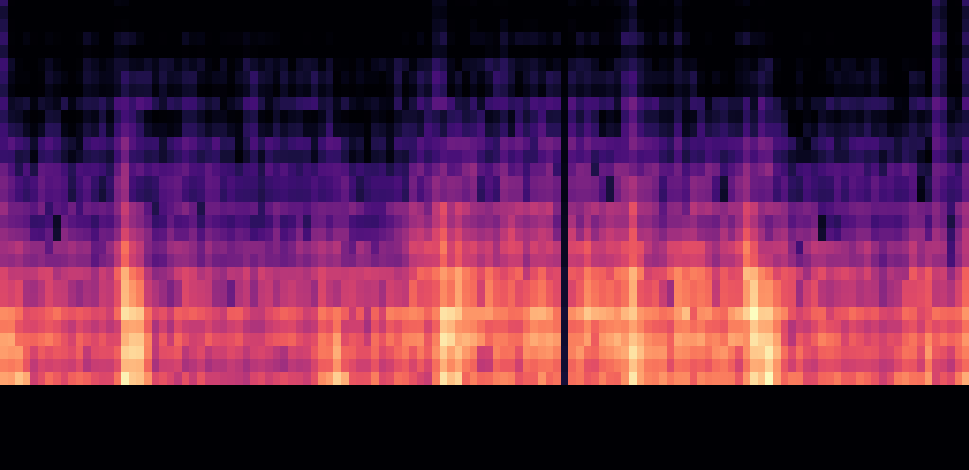

In [ ]:
x = "/content/drive/MyDrive/Project/DATA_2_norm_resized_IMG/set_A_SpecAugm/Atraining_extrahs/Atraining_extrahs_201103200218_1_mel_augm_norm_IMG.png"
Image.open(x)


# DRAFTS

In [ ]:
def visualization_spectrogram(mel_spectrogram, title):
    """visualizing result of SpecAugment

    # Arguments:
      mel_spectrogram(ndarray): mel_spectrogram to visualize.
      title(String): plot figure's title
    """
    # Show mel-spectrogram using librosa's specshow.
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(mel_spectrogram, sr=4410, n_fft=200,  hop_length=50, x_axis='time', y_axis='mel')
    plt.ylim([0,500])
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.axis("off")
    plt.show()


In [ ]:
# test
"""
set A:
1 time-wrapped
2 frequency masked images
 were generated per each available spectrogram

 sr= 4410

set B:
1 time-wrapped
1 frequency masked transformation

  sr = 4000
"""
path = "/content/drive/MyDrive/Project/DATA_2_splitted/set_A/Atraining_normal/Atraining_normal_201106221418_0.wav"
p = generate_mel_spectrogram(path)
s = spec_augment(p, frequency_mask_num=2, time_mask_num=0)
visualization_spectrogram(s,'test')

# path = "/content/drive/MyDrive/Project/DATA_2_transformation/set_A_augm_2/Atraining_murmur/Atraining_murmur_201101051108_0_timeshift_mel.npy"
# s= spec_augment(path, frequency_mask_num=2, time_mask_num=1)
# visualization_spectrogram(s,'test')

In [ ]:
# set_A_folder = "/content/drive/MyDrive/Project/test_for_input/Aset"
# output_folder_A = "/content/drive/MyDrive/Project/test_output"
# test_func(set_A_folder, output_folder_A)

In [ ]:
%cd '/content/drive/MyDrive/Project/DATA_2/set_A'

/content/drive/MyDrive/Project/DATA_2/set_A
